## Task 2 : Unsupervised Learning

In [1]:
#importing important library
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

In [3]:
data=pd.read_csv("Iris.csv")

In [4]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df=data.drop(['Id','Species'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


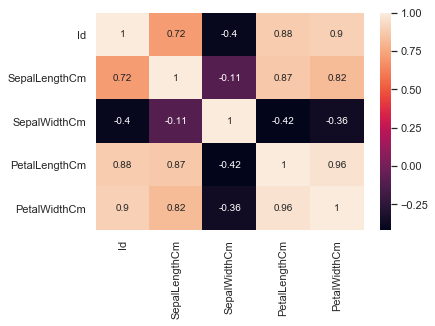

In [8]:
sns.heatmap(data.corr(), annot= True)

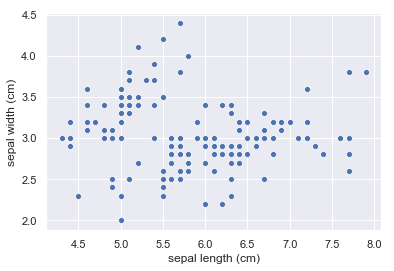

In [9]:
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=data)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


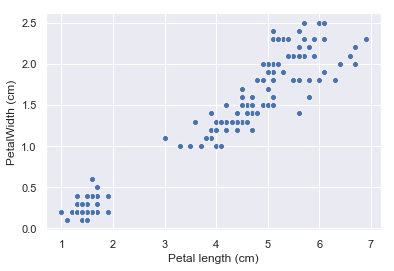

In [10]:
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data=data)
plt.xlabel('Petal length (cm)')
plt.ylabel('PetalWidth (cm)')
plt.show()


# Now ELbow Method to find number of clusters

In [11]:
wcss=[]
k_range=range(1,11)
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)

In [12]:
k_values = pd.DataFrame({'k': k_range, "WCSS":wcss})
k_values

,k,WCSS
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.554054
5,6,38.957011
6,7,34.299986
7,8,29.961863
8,9,28.420127
9,10,26.024429


(0, 10)

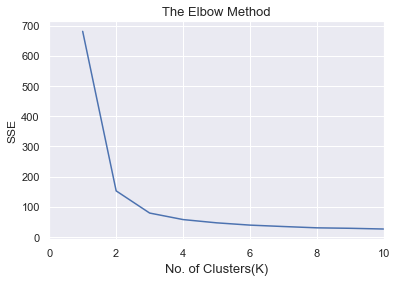

In [13]:
sns.lineplot(x="k",y="WCSS", data=k_values)
plt.xlabel('No. of Clusters(K)',fontsize=13)
plt.ylabel('SSE',fontsize=12)
plt.title('The Elbow Method',fontsize=13)
plt.xlim([0,10])

##### The optimum number of clusters (K) is where the 'elbow' occurs. Here, it occurs at K=3 and the within cluster sum of squares (WCSSE) doesn't significantly decrease with every iteration.

In [16]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)
data_y_pred = kmeans.fit_predict(df)
df["Cluster"]=data_y_pred
df["Cluster"].value_counts()

0    62
1    50
2    38
Name: Cluster, dtype: int64

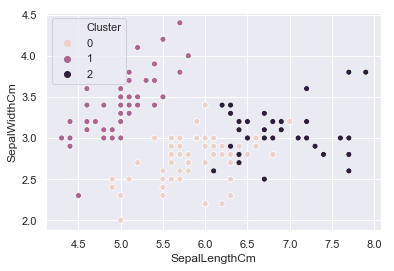

In [21]:

# Visualizing the clusters
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm',hue='Cluster')

In [22]:
# Comparing with original data
data.Species.value_counts()


Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64